<center><h1>Coursera Capstone Final Project</h1></center>

<h3>Introduction/Business Problem</h3>

Real estate prices tend to be higher where there are good schools in a particular area of a city.  When buying a home, families with young children have to decide how much they are willing to pay to live in an area with "adequate", "good", "better" or "best" schools.  The aim is to provide a metric that determines the "best value" area based on the average home price and the school rankings.

<h3>Data</h3>

Foursquare API<br>
    - Provides the list of all zip codes in a city<br>
    - Provides the list of all elementary, middle and high schools in each zip code of a city<br>
    
Zillow home price data<br>
    - Provides average home prices for each zip code for a city<br>
    
Great Schools rankings<br>
    - Provides rankings (1-10) for each school within a city<br>
    
Best Value neighborhood rankings<br>
    - Will be based on (average home price in the zip code) / (average school ranking in the zip code)

<b>Example code to be used to pull Foursquare data</b>

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, school_category_id, radius=500):
        
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            school_category_id)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
bendOR_all_schools = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   school_category_id='4bf58dd8d48988d13b941735'
                                  )

bendOR_elementary_schools = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   school_category_id='4f4533804b9074f6e4fb0105'
                                  )

bendOR_middle_schools = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   school_category_id='4f4533814b9074f6e4fb0106'
                                  )

bendOR_high_schools = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   school_category_id='4bf58dd8d48988d13d941735'
                                  )

In [ ]:
print(bendOR_all_schools.shape)
print(bendOR_elementary_schools.shape)
print(bendOR_middle_schools.shape)
print(bendOR_high_schools.shape)

In [ ]:
print(bendOR_elementary_schools.groupby('Neighborhood').count())
print(bendOR_middle_schools.groupby('Neighborhood').count())
print(bendOR_high_schools.groupby('Neighborhood').count())

<b>Zillow home price data</b>

Data location:  https://www.zillow.com/research/data/<br>
Data pull:  Home Values Index (ZHVI), Data Type - ZHVI All Homes, Geography - Zip Code<br>
Data download location:  https://files.zillowstatic.com/research/public_v2/zhvi/Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv?t=1619739061<br><br>

Data screenshot:<br>
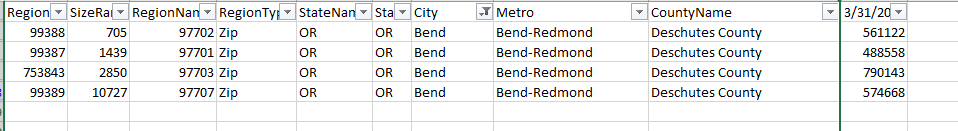

<b>Great Schools Ranking data</b><br><br>
    
Data location:  https://www.greatschools.org/oregon/bend/schools/?view=table<br>
- data spans over multiple pages, so data will have to be pulled, then consolidated<br><br>

Data screenshot:<br>
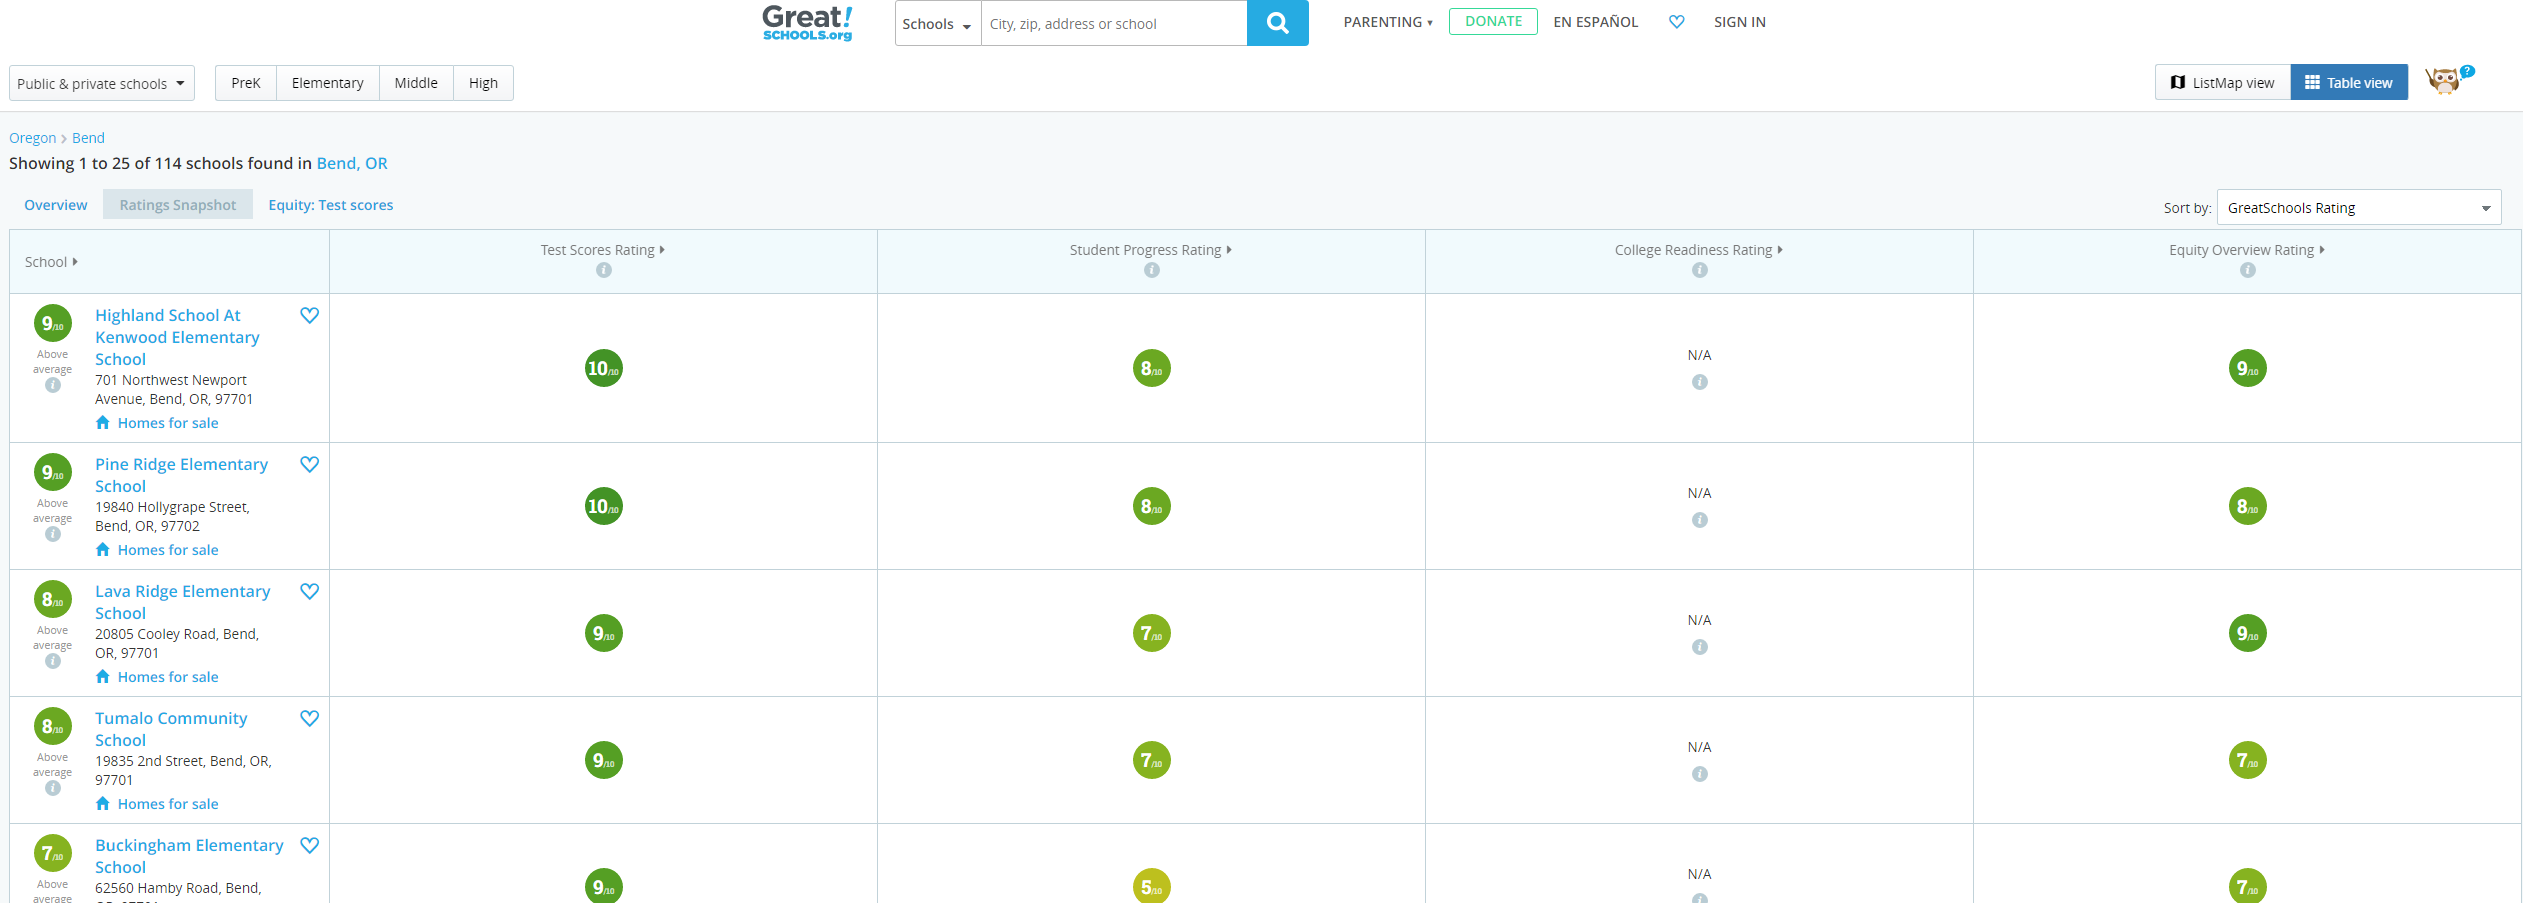

 

<b>Test City</b><br><br>
The city to be evaluated will be Bend, OR in the USA


<h3>Methodology</h3>

Download dependencies

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#import folium # map rendering library

#import beutifulsoup
import requests
from bs4 import BeautifulSoup

print('Libraries imported.')

Libraries imported.


<b>Download datasets</b>

Zip Code data for schools in Bend, OR

Define Foursquare Credentials and Version

In [5]:
# The code was removed by Watson Studio for sharing.

Your credentails:
CLIENT_ID: QJ4UWXTV5FE5ZJK2PGQ5AU0CIPJBA4ZKFAFASGMPAIP2FD3K
CLIENT_SECRET:KJCHW4VFBSMXPMUBHJ5QA2J2I0BOZCXXD20NF33CN5YEKCQM


Get list of schools in zip codes located in Bend, OR - (use Zillow list of Bend, OR zip codes?)

Create function to get list of schools based on Foursquare call using zip codes

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, school_category_id, radius=500):
        
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            school_category_id)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [ ]:
bend_all_schools = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   school_category_id='4bf58dd8d48988d13b941735'
                                  )

bend_elementary_schools = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   school_category_id='4f4533804b9074f6e4fb0105'
                                  )

bend_middle_schools = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   school_category_id='4f4533814b9074f6e4fb0106'
                                  )

bend_high_schools = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'],
                                   school_category_id='4bf58dd8d48988d13d941735'
                                  )

Check the size of the dataframes

In [ ]:
print(bend_all_schools.shape)
print(bend_elementary_schools.shape)
print(bend_middle_schools.shape)
print(bend_high_schools.shape)

Check how many schools were returned by zip code

In [ ]:
print(toronto_all_schools.groupby('Neighborhood').count())
print(toronto_elementary_schools.groupby('Neighborhood').count())
print(toronto_middle_schools.groupby('Neighborhood').count())
print(toronto_high_schools.groupby('Neighborhood').count())

Zillow home price data for Bend, OR

In [9]:
# The code was removed by Watson Studio for sharing.

In [10]:
df_zillow_homeprice = pd.read_csv(body)
df_zillow_homeprice.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,2/29/1996,3/31/1996,4/30/1996,5/31/1996,6/30/1996,7/31/1996,8/31/1996,9/30/1996,10/31/1996,11/30/1996,12/31/1996,1/31/1997,2/28/1997,3/31/1997,4/30/1997,5/31/1997,6/30/1997,7/31/1997,8/31/1997,9/30/1997,10/31/1997,11/30/1997,12/31/1997,1/31/1998,2/28/1998,3/31/1998,4/30/1998,5/31/1998,6/30/1998,7/31/1998,8/31/1998,9/30/1998,10/31/1998,11/30/1998,12/31/1998,1/31/1999,2/28/1999,3/31/1999,4/30/1999,5/31/1999,6/30/1999,7/31/1999,8/31/1999,9/30/1999,10/31/1999,11/30/1999,12/31/1999,1/31/2000,2/29/2000,3/31/2000,4/30/2000,5/31/2000,6/30/2000,7/31/2000,8/31/2000,9/30/2000,10/31/2000,11/30/2000,12/31/2000,1/31/2001,2/28/2001,3/31/2001,4/30/2001,5/31/2001,6/30/2001,7/31/2001,8/31/2001,9/30/2001,10/31/2001,11/30/2001,12/31/2001,1/31/2002,2/28/2002,3/31/2002,4/30/2002,5/31/2002,6/30/2002,7/31/2002,8/31/2002,9/30/2002,10/31/2002,11/30/2002,12/31/2002,1/31/2003,2/28/2003,3/31/2003,4/30/2003,5/31/2003,6/30/2003,7/31/2003,8/31/2003,9/30/2003,10/31/2003,11/30/2003,12/31/2003,1/31/2004,2/29/2004,3/31/2004,4/30/2004,5/31/2004,6/30/2004,7/31/2004,8/31/2004,9/30/2004,10/31/2004,11/30/2004,12/31/2004,1/31/2005,2/28/2005,3/31/2005,4/30/2005,5/31/2005,6/30/2005,7/31/2005,8/31/2005,9/30/2005,10/31/2005,11/30/2005,12/31/2005,1/31/2006,2/28/2006,3/31/2006,4/30/2006,5/31/2006,6/30/2006,7/31/2006,8/31/2006,9/30/2006,10/31/2006,11/30/2006,12/31/2006,1/31/2007,2/28/2007,3/31/2007,4/30/2007,5/31/2007,6/30/2007,7/31/2007,8/31/2007,9/30/2007,10/31/2007,11/30/2007,12/31/2007,1/31/2008,2/29/2008,3/31/2008,4/30/2008,5/31/2008,6/30/2008,7/31/2008,8/31/2008,9/30/2008,10/31/2008,11/30/2008,12/31/2008,1/31/2009,2/28/2009,3/31/2009,4/30/2009,5/31/2009,6/30/2009,7/31/2009,8/31/2009,9/30/2009,10/31/2009,11/30/2009,12/31/2009,1/31/2010,2/28/2010,3/31/2010,4/30/2010,5/31/2010,6/30/2010,7/31/2010,8/31/2010,9/30/2010,10/31/2010,11/30/2010,12/31/2010,1/31/2011,2/28/2011,3/31/2011,4/30/2011,5/31/2011,6/30/2011,7/31/2011,8/31/2011,9/30/2011,10/31/2011,11/30/2011,12/31/2011,1/31/2012,2/29/2012,3/31/2012,4/30/2012,5/31/2012,6/30/2012,7/31/2012,8/31/2012,9/30/2012,10/31/2012,11/30/2012,12/31/2012,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,11/30/2013,12/31/2013,1/31/2014,2/28/2014,3/31/2014,4/30/2014,5/31/2014,6/30/2014,7/31/2014,8/31/2014,9/30/2014,10/31/2014,11/30/2014,12/31/2014,1/31/2015,2/28/2015,3/31/2015,4/30/2015,5/31/2015,6/30/2015,7/31/2015,8/31/2015,9/30/2015,10/31/2015,11/30/2015,12/31/2015,1/31/2016,2/29/2016,3/31/2016,4/30/2016,5/31/2016,6/30/2016,7/31/2016,8/31/2016,9/30/2016,10/31/2016,11/30/2016,12/31/2016,1/31/2017,2/28/2017,3/31/2017,4/30/2017,5/31/2017,6/30/2017,7/31/2017,8/31/2017,9/30/2017,10/31/2017,11/30/2017,12/31/2017,1/31/2018,2/28/2018,3/31/2018,4/30/2018,5/31/2018,6/30/2018,7/31/2018,8/31/2018,9/30/2018,10/31/2018,11/30/2018,12/31/2018,1/31/2019,2/28/2019,3/31/2019,4/30/2019,5/31/2019,6/30/2019,7/31/2019,8/31/2019,9/30/2019,10/31/2019,11/30/2019,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020,10/31/2020,11/30/2020,12/31/2020,1/31/2021,2/28/2021,3/31/2021
0,99388,705,97702,Zip,OR,OR,Bend,Bend-Redmond,Deschutes County,148505,149506,150369,151856,152746,153068,153203,153513,153957,154535,154881,155113,155937,157250,159050,160463,160868,161103,161001,161694,162264,162607,163052,163825,164531,163298,160806,158366,159345,161946,165392,167038,168241,169266,170377,171125,170233,170253,170351,171612,171849,171929,172166,172298,172680,172943,173407,173756,174961,176563,178501,179753,180296,180408,180335,181303,182456,183827,184775,185958,187382,188492,190038,191683,193318,194551,195350,196242,197112,198173,199389,200333,201197,201812,202351,202873,203978,205153,206663,207648,208821,209696,211025,212755,214339,215237,215591,216068,216977,218187,219603,221636,223686,225941,227257,228636,230668,234700,239449,243837,247418,250907,254219,257122,259706,262366,265797,2692

GreatSchools rankings data for Bend, OR